In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6

In [3]:
with open('data/Uber-Jan-Feb-FOIL.csv') as f:
    df = pd.read_csv(f)

In [4]:
df.head(2)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765


In [5]:
df = df[['date', 'trips']]

In [6]:
df['date'] = pd.DatetimeIndex(df.date)

In [7]:
df.head(2)

,date,trips
0,2015-01-01,1132
1,2015-01-01,1765


In [8]:
df.tail()

,date,trips
349,2015-02-28,39812
350,2015-02-28,14022
351,2015-02-28,14472
352,2015-02-28,1803
353,2015-02-28,7753


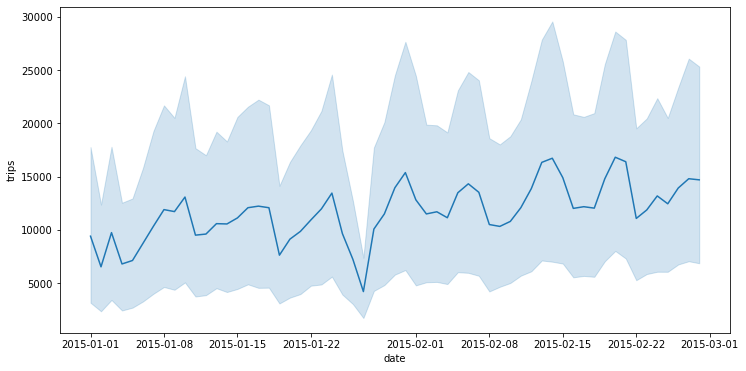

In [9]:
sns.lineplot(x = 'date', y = 'trips', data = df)

In [10]:
df.shape

(354, 2)

In [11]:
train = df.iloc[: 324, 1]
test = df.iloc[324 :, 1]

### Decomposition of data
It is for data evaluation.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df_decompose = seasonal_decompose(df.trips, period= 30)

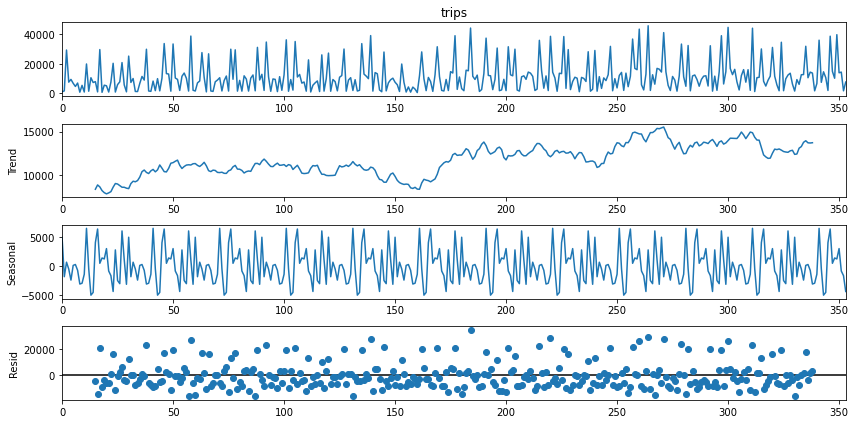

In [14]:
df_decompose.plot();

#### Finding the Parameters (p, d, q)
There are two methods:
* Using of acf and pacf plots.
* Grid search.

#### acf and pacf plots

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

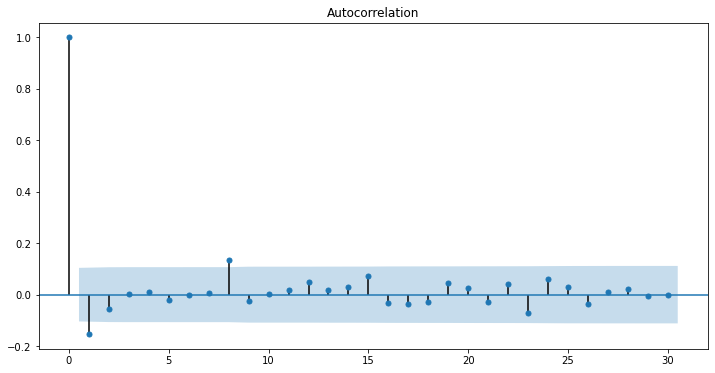

In [16]:
plot_acf(df.trips, lags= 30);

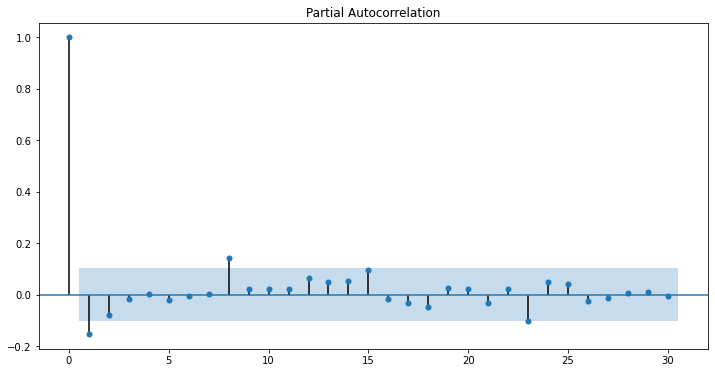

In [17]:
plot_pacf(df.trips, lags= 30);

#### Grid Search method

In [18]:
from pmdarima import auto_arima

In [19]:
auto_arima(df.trips, trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7847.035, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7725.542, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7845.037, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7669.827, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7639.726, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7625.915, Time=0.28 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7615.509, Time=0.33 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=7613.514, Time=0.65 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=7623.911, Time=0.63 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=7554.064, Time=0.86 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=7555.463, T

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Developing Arima model

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model = ARIMA(train, order=(1, 1, 1))

In [22]:
result = model.fit()

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.trips   No. Observations:                  323
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3446.515
Method:                       css-mle   S.D. of innovations          10320.800
Date:                Thu, 11 Aug 2022   AIC                           6901.030
Time:                        15:19:56   BIC                           6916.141
Sample:                             1   HQIC                          6907.062
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.6377      5.232      3.180      0.001       6.384      26.891
ar.L1.D.trips    -0.1734      0.055     -3.158      0.002      -0.281      -0.066
ma.L1.D.trips    -1.0000      0.008   -121.723      0.000      -1.016      -0.984
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.7667           +0.0000j            5.7667            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
pred = result.predict(start = len(train), end = len(train) + len(test) - 1, typ='levels')

In [25]:
pred

324    16360.148351
325    13862.444256
326    14315.090795
327    14256.120761
328    14285.869511
329    14300.233649
330    14317.265612
331    14333.834952
332    14350.484514
333    14367.120165
334    14383.758229
335    14400.395874
336    14417.033591
337    14433.671296
338    14450.309004
339    14466.946710
340    14483.584417
341    14500.222124
342    14516.859831
343    14533.497538
344    14550.135245
345    14566.772952
346    14583.410659
347    14600.048366
348    14616.686073
349    14633.323780
350    14649.961487
351    14666.599194
352    14683.236900
353    14699.874607
dtype: float64

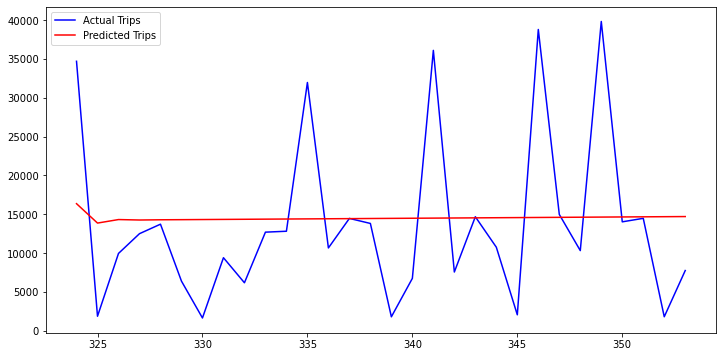

In [26]:
plt.plot(test, color = 'blue', label = 'Actual Trips')
plt.plot(pred, color = 'red', label = 'Predicted Trips')
plt.legend(loc = 0)

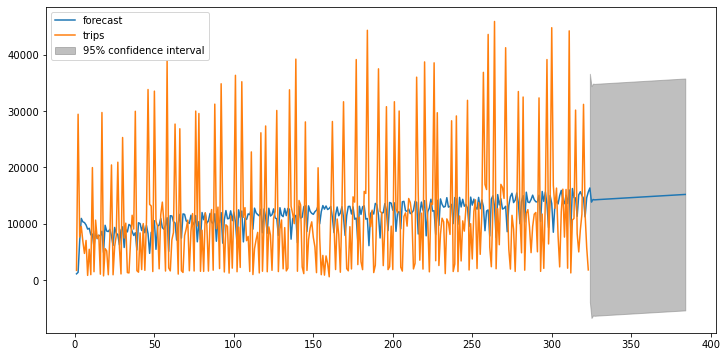

In [27]:
result.plot_predict(1, 384);